# Strava Running Data Analysis: Performance Trends and Influencing Factors

## Foreword

> “Pain is inevitable. Suffering is optional.”

A quote from one of the only books I had read about fitness. Written by Haruki Murakami. I was curious what was a man like this doing in the fitness section. At that point I hadnt run a single yard more than what was required of me -- but by the time I finished reading, I was a changed man. 

I slowly built a habit of running from 2016, enjoyed the meditative aspect of it, ran often enough but never really got out of the proverbial shallow end of the pool. Its now 2024 and after many fun years of exploring other sports, I realized my base fitness was lacking. I had decided to pick up running sometime in May, for real this time. Now I've signed up for a half marathon in November, and I want to use what I know about data science to help me with my endeavour.

## Abstract
This study is trying to analyze running data collected from my strava to identify performance trends and influencing factors. The analysis will not only provide insights into overall fitness progression but also inform training strategies for optimal race day performance.

## Summary
- Accessing the data;
- Data Cleaning;
- Insights;
- Feature Selection;
- Machine Learning;
- Conclusion;


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates 
import calendar 

%config IPCompleter.greedy=True

# Accessing the data

In [2]:
# Load the data from an export on Strava
original = pd.read_csv('../Data/activities.csv') 
print('Dataframe shape:', original.shape)
original.head()

Dataframe shape: (254, 94)


,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Activity Count,Total Steps,Carbon Saved,Pool Length,Training Load,Intensity,Average Grade Adjusted Pace,Timer Time,Total Cycles,Media
0,676696158,"Aug 15, 2016, 9:53:13 AM",Afternoon Run,Run,NaN,1414,3.31,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,681425706,"Aug 19, 2016, 10:11:34 AM",Evening Run,Run,NaN,2062,4.45,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,683559635,"Aug 21, 2016, 10:14:46 AM",Evening Run,Run,NaN,1903,4.41,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,689475888,"Aug 26, 2016, 10:22:15 AM",Evening Run,Run,NaN,1920,4.51,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,708051143,"Sep 11, 2016, 9:19:10 AM",Afternoon Run,Run,NaN,1922,4.43,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### First observations:
There are a whopping 94 columns, most of which are either null or dont contribute to the analysis, so lets keep only the relevant columns for research

# Data cleaning

In [3]:
original.columns = original.columns.str.lower().str.replace(' ','_') # Standardize the column titles
original = original[original['activity_type'] == 'Run'] # Filter to only Running values
df = original.copy(deep=True) # Make a copy so that there is always the original to reference to

In [4]:
print(df.shape)
df.head()

(217, 94)


,activity_id,activity_date,activity_name,activity_type,activity_description,elapsed_time,distance,max_heart_rate,relative_effort,commute,...,activity_count,total_steps,carbon_saved,pool_length,training_load,intensity,average_grade_adjusted_pace,timer_time,total_cycles,media
0,676696158,"Aug 15, 2016, 9:53:13 AM",Afternoon Run,Run,NaN,1414,3.31,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,681425706,"Aug 19, 2016, 10:11:34 AM",Evening Run,Run,NaN,2062,4.45,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,683559635,"Aug 21, 2016, 10:14:46 AM",Evening Run,Run,NaN,1903,4.41,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,689475888,"Aug 26, 2016, 10:22:15 AM",Evening Run,Run,NaN,1920,4.51,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,708051143,"Sep 11, 2016, 9:19:10 AM",Afternoon Run,Run,NaN,1922,4.43,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def list_nulls(df):
    null_df = [[col, df[col].isnull().sum()] for col in df.columns]
    print('Null Data:', df.isnull().sum().sum())
    print(list(filter(lambda x: x[1]>0, null_df)))

list_nulls(df)

Null Data: 14355
[['activity_description', 187], ['max_heart_rate', 160], ['relative_effort', 160], ['activity_private_note', 217], ['activity_gear', 168], ['athlete_weight', 92], ['bike_weight', 217], ['average_speed', 90], ['elevation_loss', 100], ['average_positive_grade', 217], ['average_negative_grade', 217], ['max_cadence', 217], ['average_cadence', 217], ['max_heart_rate.1', 170], ['average_heart_rate', 160], ['max_watts', 217], ['average_watts', 217], ['max_temperature', 217], ['average_temperature', 217], ['relative_effort.1', 160], ['total_work', 217], ['number_of_runs', 217], ['uphill_time', 217], ['downhill_time', 217], ['other_time', 217], ['perceived_exertion', 215], ['type', 217], ['start_time', 217], ['weighted_average_power', 217], ['power_count', 217], ['prefer_perceived_exertion', 185], ['perceived_relative_effort', 215], ['total_weight_lifted', 217], ['from_upload', 90], ['grade_adjusted_distance', 62], ['weather_observation_time', 190], ['weather_condition', 190], 

In [6]:
columns_keep = ['activity_date','moving_time','distance','max_speed','average_speed','elevation_gain','elevation_loss','elevation_low','elevation_high','max_grade','average_grade','max_heart_rate','average_heart_rate','total_steps']
df = df.loc[:,columns_keep]
print(df.shape)
df.head()

(217, 14)


,activity_date,moving_time,distance,max_speed,average_speed,elevation_gain,elevation_loss,elevation_low,elevation_high,max_grade,average_grade,max_heart_rate,average_heart_rate,total_steps
0,"Aug 15, 2016, 9:53:13 AM",1314.0,3.31,7.2,NaN,39.465000,NaN,53.200001,87.599998,16.200001,-0.241473,NaN,NaN,NaN
1,"Aug 19, 2016, 10:11:34 AM",1802.0,4.45,8.3,NaN,63.403999,NaN,50.299999,87.300003,40.200001,0.125682,NaN,NaN,NaN
2,"Aug 21, 2016, 10:14:46 AM",1898.0,4.41,5.5,NaN,51.626202,NaN,46.400002,87.699997,16.299999,-0.002268,NaN,NaN,NaN
3,"Aug 26, 2016, 10:22:15 AM",1900.0,4.51,5.7,NaN,119.328003,NaN,64.000000,137.699997,22.400000,0.026587,NaN,NaN,NaN
4,"Sep 11, 2016, 9:19:10 AM",1913.0,4.43,4.9,NaN,130.173996,NaN,64.000000,138.300003,23.500000,0.069921,NaN,NaN,NaN


In [7]:
df = df.dropna(axis=1,how='all') # Dropping all the rows with completely null rows
df.shape

(217, 14)

In [8]:
# Convert 'activity_date' to datetime
df['activity_date'] = pd.to_datetime(df['activity_date'])

# Create year and month columns
df['year'] = df['activity_date'].dt.year
df['month'] = df['activity_date'].dt.month

In [9]:
df = df.drop(df[(df.distance < 1)].index) # Remove any runs under 1km, most likely misinputs or warmups
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(212, 16)


,activity_date,moving_time,distance,max_speed,average_speed,elevation_gain,elevation_loss,elevation_low,elevation_high,max_grade,average_grade,max_heart_rate,average_heart_rate,total_steps,year,month
0,2016-08-15 09:53:13,1314.0,3.31,7.2,NaN,39.465000,NaN,53.200001,87.599998,16.200001,-0.241473,NaN,NaN,NaN,2016,8
1,2016-08-19 10:11:34,1802.0,4.45,8.3,NaN,63.403999,NaN,50.299999,87.300003,40.200001,0.125682,NaN,NaN,NaN,2016,8
2,2016-08-21 10:14:46,1898.0,4.41,5.5,NaN,51.626202,NaN,46.400002,87.699997,16.299999,-0.002268,NaN,NaN,NaN,2016,8
3,2016-08-26 10:22:15,1900.0,4.51,5.7,NaN,119.328003,NaN,64.000000,137.699997,22.400000,0.026587,NaN,NaN,NaN,2016,8
4,2016-09-11 09:19:10,1913.0,4.43,4.9,NaN,130.173996,NaN,64.000000,138.300003,23.500000,0.069921,NaN,NaN,NaN,2016,9


In [10]:
# Check for nulls again, consider any imputes or further drops
list_nulls(df)

Null Data: 665
[['average_speed', 90], ['elevation_loss', 100], ['max_heart_rate', 160], ['average_heart_rate', 160], ['total_steps', 155]]


In [11]:
df['moving_time_minutes'] = round(df['moving_time']/60, 2)
df['distance'] = round(df['distance'], 2) # Since its already in km, no need for any conversion
df['pace'] = round(df['moving_time_minutes'] / df['distance'],2)
df['max_speed'] = round(1000/df['max_speed'] / 60,2)
df['week'] = df['activity_date'].dt.to_period('W')
df['start_date'] = df.week.apply(lambda r: r.start_time.date())
df = df.drop(columns=['average_speed']) # No need for average speed since we can calculate the pace
df.head()

,activity_date,moving_time,distance,max_speed,elevation_gain,elevation_loss,elevation_low,elevation_high,max_grade,average_grade,max_heart_rate,average_heart_rate,total_steps,year,month,moving_time_minutes,pace,week,start_date
0,2016-08-15 09:53:13,1314.0,3.31,2.31,39.465000,NaN,53.200001,87.599998,16.200001,-0.241473,NaN,NaN,NaN,2016,8,21.90,6.62,2016-08-15/2016-08-21,2016-08-15
1,2016-08-19 10:11:34,1802.0,4.45,2.01,63.403999,NaN,50.299999,87.300003,40.200001,0.125682,NaN,NaN,NaN,2016,8,30.03,6.75,2016-08-15/2016-08-21,2016-08-15
2,2016-08-21 10:14:46,1898.0,4.41,3.03,51.626202,NaN,46.400002,87.699997,16.299999,-0.002268,NaN,NaN,NaN,2016,8,31.63,7.17,2016-08-15/2016-08-21,2016-08-15
3,2016-08-26 10:22:15,1900.0,4.51,2.92,119.328003,NaN,64.000000,137.699997,22.400000,0.026587,NaN,NaN,NaN,2016,8,31.67,7.02,2016-08-22/2016-08-28,2016-08-22
4,2016-09-11 09:19:10,1913.0,4.43,3.40,130.173996,NaN,64.000000,138.300003,23.500000,0.069921,NaN,NaN,NaN,2016,9,31.88,7.20,2016-09-05/2016-09-11,2016-09-05


## Excess of nulls in the columns Elevation loss, Max Heart Rate, Average Heart Rate and Total Steps.
Besides average speed, I suspect the other nulls are due to the fact that majority of my runs were run **before** I bought a fitness tracker watch. Unfortunately, will have to drop them. 

But instead of dropping the columns, I will instead filter the dataframe to the time I started training in 2024, which should have a complete set of data.

In [12]:
latest_df = df[df.activity_date > '2024-04-01']
list_nulls(latest_df)
print(latest_df.shape)
latest_df.head()

Null Data: 2
[['max_heart_rate', 1], ['average_heart_rate', 1]]
(43, 19)


,activity_date,moving_time,distance,max_speed,elevation_gain,elevation_loss,elevation_low,elevation_high,max_grade,average_grade,max_heart_rate,average_heart_rate,total_steps,year,month,moving_time_minutes,pace,week,start_date
169,2024-04-23 03:41:19,1005.0,1.36,6.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.0,155.832840,1736.0,2024,4,16.75,12.32,2024-04-22/2024-04-28,2024-04-22
170,2024-04-24 00:04:13,2312.0,4.05,4.48,168.199997,166.199997,36.400002,104.599998,48.522873,0.049375,174.0,150.946732,5636.0,2024,4,38.53,9.51,2024-04-22/2024-04-28,2024-04-22
171,2024-04-25 01:15:43,1117.0,1.35,5.36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,175.0,151.322296,1876.0,2024,4,18.62,13.79,2024-04-22/2024-04-28,2024-04-22
172,2024-05-01 08:12:56,2280.0,4.07,3.95,278.000000,282.799988,72.199997,126.599998,49.813019,-0.117833,174.0,159.780838,5758.0,2024,5,38.00,9.34,2024-04-29/2024-05-05,2024-04-29
173,2024-04-29 03:30:40,1963.0,2.01,6.56,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,183.0,150.099335,2980.0,2024,4,32.72,16.28,2024-04-29/2024-05-05,2024-04-29


In [13]:
latest_df['average_heart_rate'] = latest_df['average_heart_rate'].fillna(value=latest_df['average_heart_rate'].mean())
latest_df['max_heart_rate'] = latest_df['max_heart_rate'].fillna(value=latest_df['max_heart_rate'].mean())
list_nulls(latest_df)

Null Data: 0
[]


C:\Users\azaid\AppData\Local\Temp\ipykernel_17248\1622926387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_df['average_heart_rate'] = latest_df['average_heart_rate'].fillna(value=latest_df['average_heart_rate'].mean())
C:\Users\azaid\AppData\Local\Temp\ipykernel_17248\1622926387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_df['max_heart_rate'] = latest_df['max_heart_rate'].fillna(value=latest_df['max_heart_rate'].mean())


In [14]:
zero_rows = latest_df[(latest_df == 0).any(axis=1)]
print(zero_rows.shape)
zero_rows

(6, 19)


,activity_date,moving_time,distance,max_speed,elevation_gain,elevation_loss,elevation_low,elevation_high,max_grade,average_grade,max_heart_rate,average_heart_rate,total_steps,year,month,moving_time_minutes,pace,week,start_date
169,2024-04-23 03:41:19,1005.0,1.36,6.01,0.0,0.0,0.0,0.0,0.0,0.0,186.0,155.832840,1736.0,2024,4,16.75,12.32,2024-04-22/2024-04-28,2024-04-22
171,2024-04-25 01:15:43,1117.0,1.35,5.36,0.0,0.0,0.0,0.0,0.0,0.0,175.0,151.322296,1876.0,2024,4,18.62,13.79,2024-04-22/2024-04-28,2024-04-22
173,2024-04-29 03:30:40,1963.0,2.01,6.56,0.0,0.0,0.0,0.0,0.0,0.0,183.0,150.099335,2980.0,2024,4,32.72,16.28,2024-04-29/2024-05-05,2024-04-29
175,2024-05-07 02:21:57,1714.0,3.28,6.46,0.0,0.0,0.0,0.0,0.0,0.0,189.0,166.983658,4244.0,2024,5,28.57,8.71,2024-05-06/2024-05-12,2024-05-06
176,2024-05-08 03:55:46,2147.0,2.09,6.66,0.0,0.0,0.0,0.0,0.0,0.0,190.0,157.210068,3082.0,2024,5,35.78,17.12,2024-05-06/2024-05-12,2024-05-06
199,2024-07-24 14:49:33,1086.0,2.24,6.35,0.0,0.0,0.0,0.0,0.0,0.0,180.0,169.278091,2878.0,2024,7,18.10,8.08,2024-07-22/2024-07-28,2024-07-22


## Zero values in many elevation metrics. 
Checking on actual strava, I found that these were manual uploads that did not upload properly. Will drop these.

In [15]:
latest_df = latest_df.drop(zero_rows.index)
latest_df.shape

(37, 19)

In [16]:
latest_df.head()

,activity_date,moving_time,distance,max_speed,elevation_gain,elevation_loss,elevation_low,elevation_high,max_grade,average_grade,max_heart_rate,average_heart_rate,total_steps,year,month,moving_time_minutes,pace,week,start_date
170,2024-04-24 00:04:13,2312.0,4.05,4.48,168.199997,166.199997,36.400002,104.599998,48.522873,0.049375,174.0,150.946732,5636.0,2024,4,38.53,9.51,2024-04-22/2024-04-28,2024-04-22
172,2024-05-01 08:12:56,2280.0,4.07,3.95,278.000000,282.799988,72.199997,126.599998,49.813019,-0.117833,174.0,159.780838,5758.0,2024,5,38.00,9.34,2024-04-29/2024-05-05,2024-04-29
174,2024-05-04 09:41:57,2359.0,5.01,1.23,193.399994,164.600006,-1.600000,37.799999,49.948692,0.570642,182.0,166.345352,6024.0,2024,5,39.32,7.85,2024-04-29/2024-05-05,2024-04-29
177,2024-05-17 22:25:45,1937.0,3.40,4.27,166.400024,166.399994,442.399994,481.600006,48.871666,0.047297,166.0,151.455139,4770.0,2024,5,32.28,9.49,2024-05-13/2024-05-19,2024-05-13
178,2024-05-18 23:22:30,8935.0,14.81,4.98,992.799927,1008.799988,395.200012,523.000000,49.956367,-0.156001,202.0,181.586426,20382.0,2024,5,148.92,10.06,2024-05-13/2024-05-19,2024-05-13


## Clean data at last

# Insights

Text(0.5, 1.0, 'Max speed vs distance')

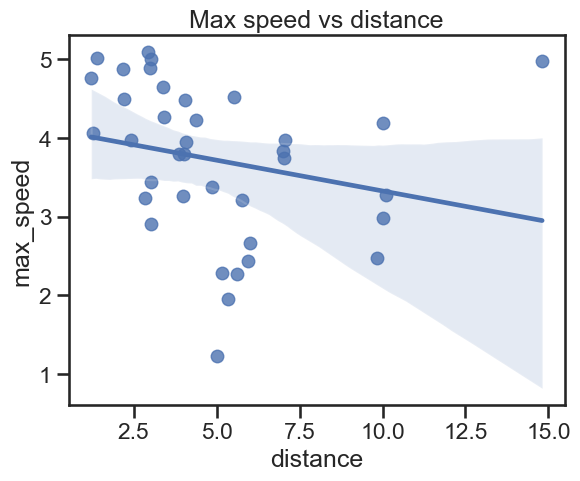

In [17]:

sns.set(style='ticks',context='talk')
sns.regplot(x='distance',y='max_speed',data=latest_df).set_title('Max speed vs distance')

## Lets try create a scatterplot instead, this should identify any clustering 

C:\Users\azaid\AppData\Local\Temp\ipykernel_17248\724995330.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


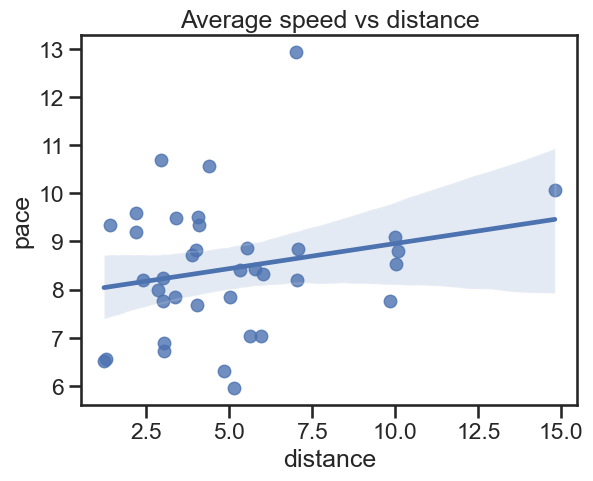

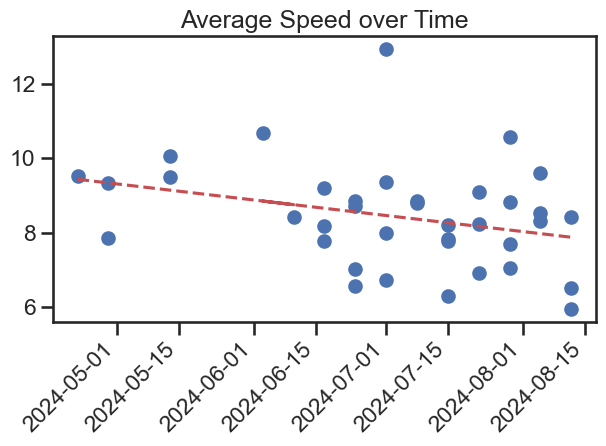

In [19]:
sns.set(style='ticks',context='talk')
sns.regplot(x='distance',y='pace',data=latest_df).set_title('Average speed vs distance')

fig = plt.figure()
ax1 = fig.add_subplot(111)

x = np.asarray(latest_df.start_date)
y = np.asarray(latest_df.pace)

ax1.scatter(x,y)
ax1.set_title('Average Speed over Time')
x2 = mdates.date2num(x)
z = np.polyfit(x2,y,1)
p = np.poly1d(z)
plt.plot(x,p(x2), 'r--')

fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

In [11]:
# Assuming df is your DataFrame with the running data
# and you've already calculated yearly_stats as before

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)
        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]
        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3])

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0], bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                dir_vec = self.com - self.bubbles[i, :2]
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        new_point1 = self.bubbles[i, :2] + orth * self.step_dist
                        new_point2 = self.bubbles[i, :2] - orth * self.step_dist
                        dist1 = self.center_distance(self.com, np.array([new_point1]))
                        dist2 = self.center_distance(self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()
            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors,font_color):
        for i in range(len(self.bubbles)):
            circ = plt.Circle(self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center',color=font_color,fontname='Berlin Sans FB',size='medium',fontweight='light')

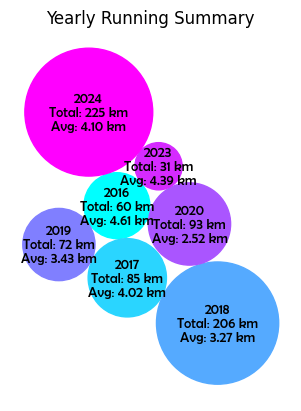

In [12]:
# Prepare data for bubble chart
num_years = len(yearly_stats)
colors = plt.cm.cool(np.linspace(0, 1, num_years))
yearly_stats['color'] = colors.tolist()  # Convert numpy array to list
bubble_chart = BubbleChart(area=yearly_stats['total_distance'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
labels = [f"{year}\nTotal: {total:.0f} km\nAvg: {avg:.2f} km" 
          for year, total, avg in zip(yearly_stats['year'], 
                                      yearly_stats['total_distance'], 
                                      yearly_stats['avg_distance'])]
bubble_chart.plot(ax, labels, yearly_stats['color'],'black')
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Yearly Running Summary')

plt.show()